### Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data from admissions.csv 

In [2]:
df = pd.read_csv("admission.csv")

### Build Machine Learning Model 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Model with all features 

In [32]:
X = df[['Gre','Toefl','Cgpa','Rating','Sop','Lor','Research']]
y = df['Chance'] * 100

In [33]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [34]:
## Fit model or Training Model
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [35]:
model.coef_, model.intercept_

(array([ 0.21414142,  0.27703868, 11.50539787,  0.55569283,  0.05103137,
         2.04133847,  2.412567  ]),
 -134.4167341195072)

In [36]:
model.score(X_train,y_train)

0.8320945273130534

In [9]:
y_pred = model.predict(X_test)

In [10]:
## get MSE, R2 and MAE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [13]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

rmse = np.sqrt(mse)
print(f"RMSE   : {rmse:0.2f}")

r2score = r2_score(y_test, y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 40.80
Mean Absolute Error : 4.83
RMSE   : 6.39
R2 Score: 0.77


## Standardization of DataSet

In [15]:
X = df[['Gre','Toefl','Cgpa']]
y = df['Chance'] * 100

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [17]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [26]:
# Scale Train data 
X_train_scaled = ss.fit_transform(X_train)

In [25]:
print(f"{X_train_scaled[:,0].mean():f} {X_train_scaled[:,0].std()}")

-0.000000 1.0


In [27]:
## Fit model or Training Model
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
model.score(X_train_scaled,y_train)

0.8122343451664386

In [29]:
# Scale test data with same scale as train data
X_test_scaled = ss.transform(X_test)

In [30]:
y_pred = model.predict(X_test_scaled)

In [31]:
score = r2_score(y_test,y_pred)
print(f"R2 Score: {score:0.2f}")

R2 Score: 0.76


In [143]:
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

Mean Squared Error : 41.34


In [144]:
res = pd.DataFrame({'Actual' : y_test, 'Pred' : y_pred})

In [145]:
res.head()

Actual       Pred
90     64.0  62.802152
254    85.0  83.209435
283    80.0  79.119818
445    91.0  85.046086
461    68.0  60.222891

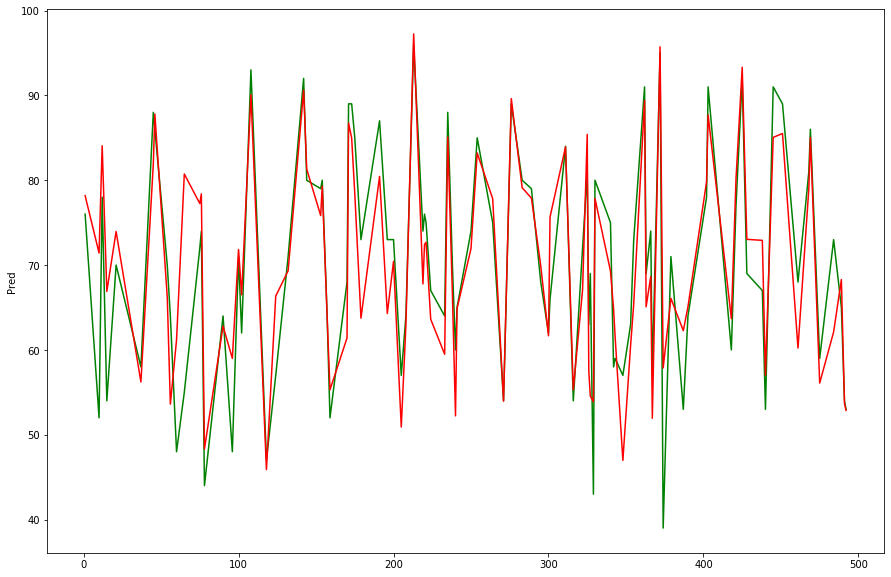

In [146]:
plt.gcf().set_size_inches(15,10)
sns.lineplot(res.index, res['Actual'], color='green')
sns.lineplot(res.index, res['Pred'], color='red')